In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,
                 shuffle= True,
                 random_state = 0)

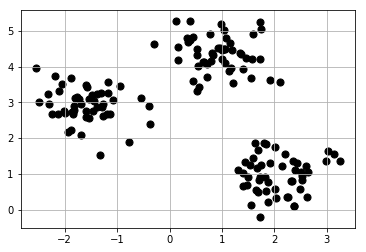

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],
           X[:,1], 
           c='black',
           marker='o',
           s=50)
plt.grid()
plt.show()

K-means algorithm in a nut shell

1. Randomly pick k centroids from the sample points as initial cluster centers
2. Assign each sample to the nearest centroid
3. Move the centroids to the center of the samples that were assigned to it
4. Repeat Steps 2 and 3 until the cluster assignments do not change or a user-defined tolderance or a maximum number of iterations is reached

Measuring similarity- e.g., opposite of distance

Squared Euclidean Distance is the sum of swared differnce between the features of two points. 
K-means can use within-cluster sum of squared errors (cluster inertia)



In [9]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3,
           init = 'random',
           n_init = 10,
           max_iter = 300,
           tol=1e-04,
           random_state= 0)
y_km = km.fit_predict(X)

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0,
       0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1,
       2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0,
       1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0,
       2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2,
       1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1], dtype=int32)

Kmeans ++ places centroids far away from each other. For each sample X that is not in M find the minimum squared distance. To randomly select the next centroid use a weighted probability distribution. Repeat until centroids are chosen and proceed with k-means. 

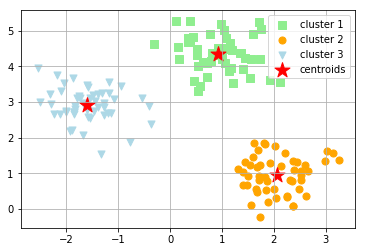

In [11]:
>>> plt.scatter(X[y_km==0,0], 
...             X[y_km ==0,1], 
...             s=50, 
...             c='lightgreen', 
...             marker='s', 
...             label='cluster 1')
>>> plt.scatter(X[y_km ==1,0], 
...             X[y_km ==1,1], 
...             s=50, 
...             c='orange', 
...             marker='o', 
...             label='cluster 2')
>>> plt.scatter(X[y_km ==2,0], 
...             X[y_km ==2,1], 
...             s=50, 
...             c='lightblue', 
...             marker='v', 
...             label='cluster 3')
>>> plt.scatter(km.cluster_centers_[:,0],
...             km.cluster_centers_[:,1], 
...             s=250, 
...             marker='*', 
...             c='red', 
...             label='centroids')
>>> plt.legend()
>>> plt.grid()
>>> plt.show()

Fuzzy Clustering (FCM) is similar to k-means except replace the hard cluster assignment by probabilities for each point belonging to each cluster. 

Objective function is within cluster sum-squared-error except the membership indicator w is not binary but instead a probability. 

Weights have a reasonably complex (but understandable form)

In [12]:
### Evaluate using "distortion" metric
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


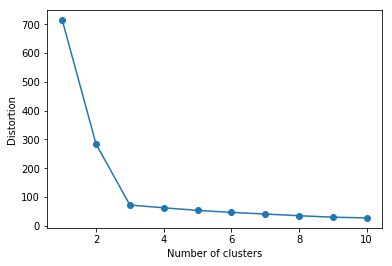

In [17]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

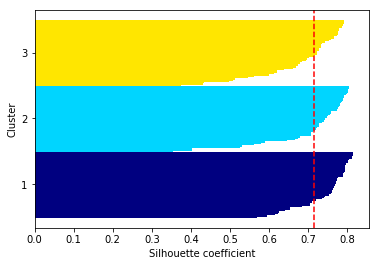

In [18]:
>>> km = KMeans(n_clusters=3, 
...             init='k-means++', 
...             n_init=10, 
...             max_iter=300,
...             tol=1e-04,
...             random_state=0)
>>> y_km = km.fit_predict(X)

>>> import numpy as np
>>> from matplotlib import cm
>>> from sklearn.metrics import silhouette_samples
>>> cluster_labels = np.unique(y_km)
>>> n_clusters = cluster_labels.shape[0]
>>> silhouette_vals = silhouette_samples(X, 
...                                      y_km, 
...                                      metric='euclidean')
>>> y_ax_lower, y_ax_upper = 0, 0
>>> yticks = []
>>> for i, c in enumerate(cluster_labels):
...     c_silhouette_vals = silhouette_vals[y_km == c]
...     c_silhouette_vals.sort()
...     y_ax_upper += len(c_silhouette_vals)
...     color = cm.jet(i / n_clusters)
...     plt.barh(range(y_ax_lower, y_ax_upper), 
...              c_silhouette_vals, 
...              height=1.0, 
...              edgecolor='none', 
...              color=color)
...     yticks.append((y_ax_lower + y_ax_upper) / 2)
...     y_ax_lower += len(c_silhouette_vals)
>>> silhouette_avg = np.mean(silhouette_vals)
>>> plt.axvline(silhouette_avg,
...             color="red", 
...             linestyle="--") 
>>> plt.yticks(yticks, cluster_labels + 1)
>>> plt.ylabel('Cluster')
>>> plt.xlabel('Silhouette coefficient')
>>> plt.show()